In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("csvfiles/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [9]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count) #gives as spam for second one

array([0, 1])

In [10]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9856424982053122

**Sklearn Pipeline** 
used to use witout transform the emails

In [11]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [12]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [13]:
clf.score(X_test,y_test)

0.9856424982053122

In [14]:
clf.predict(emails)

array([0, 1])

In [15]:
clf.predict(["come tmr"])

array([0])

In [16]:
clf.predict(["""50,000 participants & 1000s of concurrent views later, we are back with our FREE Options Trading Workshop with Sensibull CEO Abid.

This workshop is all about Practical Options Trading.

We will cover topics like:

How to predict market direction
When to use which Option Strategy
Comparing option strategies for different market conditions
Choosing the right Risk-Reward, Payoff, & Probability of Profit
This will be on Saturday, 10th June, 10:30 AM on Sensibull’s YouTube Channel.

Click on the button below and hit the bell icon to get notified of the event!"""])

array([0])

In [17]:
y_predicted=clf.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_predicted,y_test)

In [19]:
cm1

array([[1212,   19],
       [   1,  161]])

Text(0.5, 1.0, 'Heatmap')

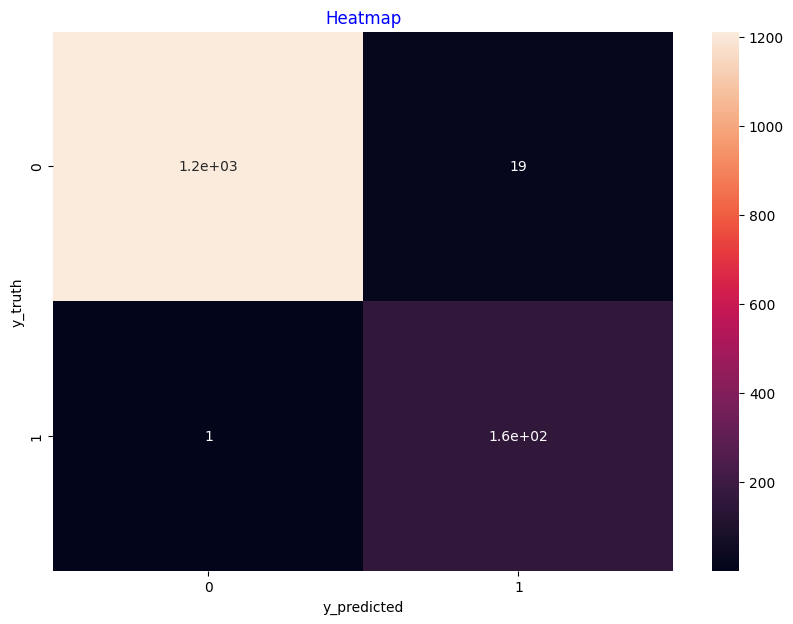

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel("y_predicted")
plt.ylabel("y_truth")
plt.title("Heatmap",color="Blue")